In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import json
from wordcloud import WordCloud
from data_processing.data_preprocessing import read_file

# Exploring the training data

We have the following features:
- ids (string)
- comment_text (string)
- toxic (boolean)
- severe_toxic (boolean)
- obscene (boolean)
- threat (boolean)
- insult (boolean)
- identity_hate (boolean)


In [ ]:
df = pd.read_csv('../data/kaggle/train.csv')
df

## Amount of Rows / Length

In [4]:
total = len(df)
total

159571

In [5]:
is_toxic = df[df['toxic'] == 1]
total_is_toxic = len(is_toxic)

is_severe_toxic = df[df['severe_toxic'] == 1]
total_is_severe_toxic = len(is_severe_toxic)

is_obscene = df[df['obscene'] == 1]
total_is_obscene = len(is_obscene)

is_threat = df[df['threat'] == 1]
total_is_threat = len(is_threat)

is_insult = df[df['insult'] == 1]
total_is_insult = len(is_insult)

is_identity_hate = df[df['identity_hate'] == 1]
total_is_identity_hat = len(is_identity_hate)

In [87]:
# Plotting config
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticksplt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

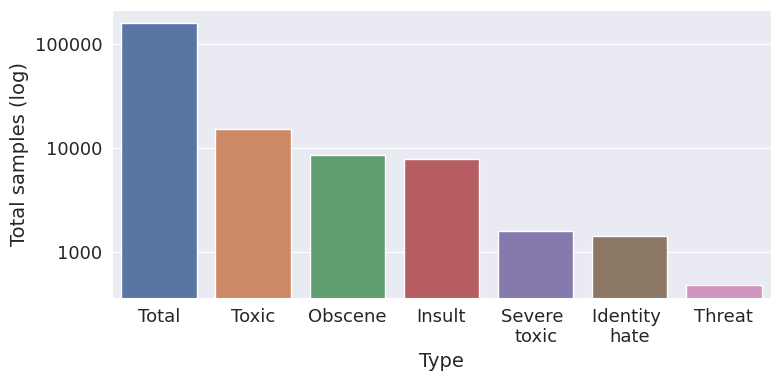

In [91]:
df_classes = df[["id", "toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]]

df_long = pd.melt(df_classes, id_vars='id', value_vars=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])
grouped = df_long.groupby('variable', as_index=False).sum(numeric_only = True)

add_data = pd.DataFrame.from_dict({'variable':['total'], 'value':[total]})
grouped = pd.concat([grouped, add_data], ignore_index=True)

grouped = grouped.sort_values(by='value', ascending = False)

plt.figure(figsize=(8,4), tight_layout=True)
ax = sns.barplot(x=grouped['variable'], y=grouped['value'], palette='deep', errorbar=None)
ax.set(title='', xlabel='Type', ylabel='Total samples (log)')

labels = [item.get_text().capitalize() for item in ax.get_xticklabels()]
labels[4] = 'Severe \ntoxic'
labels[5] = 'Identity \nhate'
ax.set_xticklabels(labels)

plt.yscale('log')

ax.yaxis.set_major_formatter(ScalarFormatter())

plt.show()

In [6]:
model = '1679576926'
# model = '1679575993'
# model = '1679580814'
# model = '1679581240'
model = 'smallerTestSize'
model = 'test30StopwordRemoval'

model_scores_df = pd.read_csv(f'../logs/{model}/model_scores.csv', sep=';')

model_scores_df.head()

,total_samples,training_loss,training_accuracy,validation_loss,validation_accuracy,test_loss,test_accuracy,test_f1_score
0,500,0.681862,0.678222,0.685463,0.636,0.682504,0.6908,0.270299
1,1000,0.662746,0.752444,0.658466,0.732,0.653768,0.8168,0.380761
2,1500,0.616127,0.838667,0.605836,0.816,0.656951,0.5980,0.303825
3,2000,0.562385,0.824000,0.580330,0.736,0.583263,0.7308,0.355474
4,2500,0.500978,0.846667,0.489574,0.876,0.559293,0.7380,0.381755


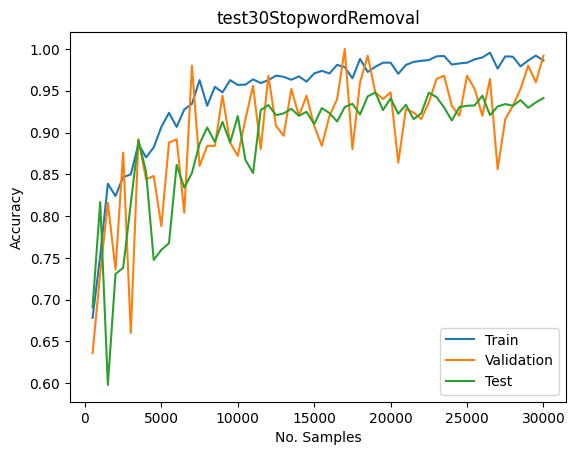

In [8]:
plt.plot('total_samples', 'training_accuracy', data=model_scores_df, label='Train')
plt.plot('total_samples', 'validation_accuracy', data=model_scores_df, label='Validation')
plt.plot('total_samples', 'test_accuracy', data=model_scores_df, label='Test')

plt.legend()
plt.title(model)
plt.ylabel('Accuracy')
plt.xlabel('No. Samples')

plt.show()

## Stopword Removal
Removing the stopwords based on the [NLTK list](https://gist.github.com/sebleier/554280) of english stopwords removes ~150 words (=152 words less when comparing 30kStopwordRemovalLowerCase and Test30 experiments). 


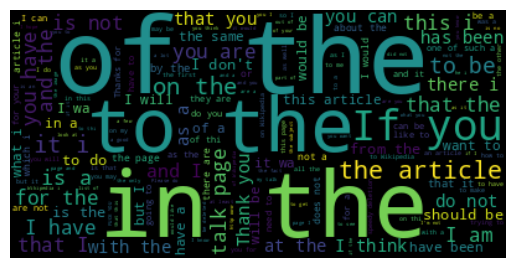

In [9]:
with open(f'../logs/{model}/data/bag_of_words.json') as file:
    bag_of_tokens = json.load(file)
    
    
documents = read_file("../data/kaggle/train.csv")

text = ""
for document in documents:
    text += document.content + " "

wordcloud = WordCloud(stopwords=[]).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
plt.show()